In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
from numpy.linalg import inv, qr, det
import nltk
import os
import matplotlib.patches as mpatches

In [10]:
# import data without outlier removal
df=pd.read_excel('VAE1817_BSEV_F_Young1.xlsx')
df.reset_index(drop=True,inplace=True)
df.head()

,AGE_YRS,NUMDAYS,VAX_DOSE_SERIES,M/F,BIRTHDEF_Y/N,NUM_SYMPS,SYMP_SEV,MEDS_Y/N,CILL_Y/N,HIST_Y/N,...,AR,GM,LA,LG,LL,MO,NS,RA,RL,SEVERITY
0,35.0,18,1,1,0,2,2.000000,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,52.0,3,2,1,0,1,0.000000,0,0,1,...,0,0,0,0,0,0,0,1,0,1
2,11.0,52,1,1,0,2,0.000000,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,16.0,0,1,0,0,3,1.333333,1,1,1,...,0,0,0,0,0,0,0,1,0,1
4,11.0,0,1,0,0,2,0.000000,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [11]:
# import data and split/standardize for explained variance
from sklearn.decomposition import PCA
df.reset_index(drop=True,inplace=True)
pca = PCA(n_components=2, svd_solver='full')
# Separating out the features
X = df.iloc[:,:-1].values
# Separating out the target
y = df.iloc[:,-1].values
# Standardizing the features
X = StandardScaler().fit_transform(X)
pca.fit(X)
PCs=pca.transform(X)

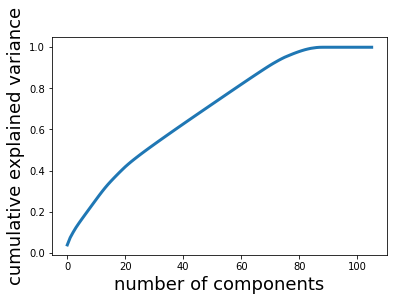

In [12]:
# plot cumulative explained variance
EVR=PCA(svd_solver='full').fit(X)
plt.plot(np.cumsum(EVR.explained_variance_ratio_),linewidth=3)
plt.xlabel('number of components',fontsize=18)
plt.ylabel('cumulative explained variance',fontsize=18);
plt.savefig('EXP_Var_Outliers.png')

In [13]:
# compile pca data with severity identifiers
pDf = pd.DataFrame(data = PCs
             , columns = ['principal component 1', 'principal component 2'])
fDf = pDf.join(df['SEVERITY'])

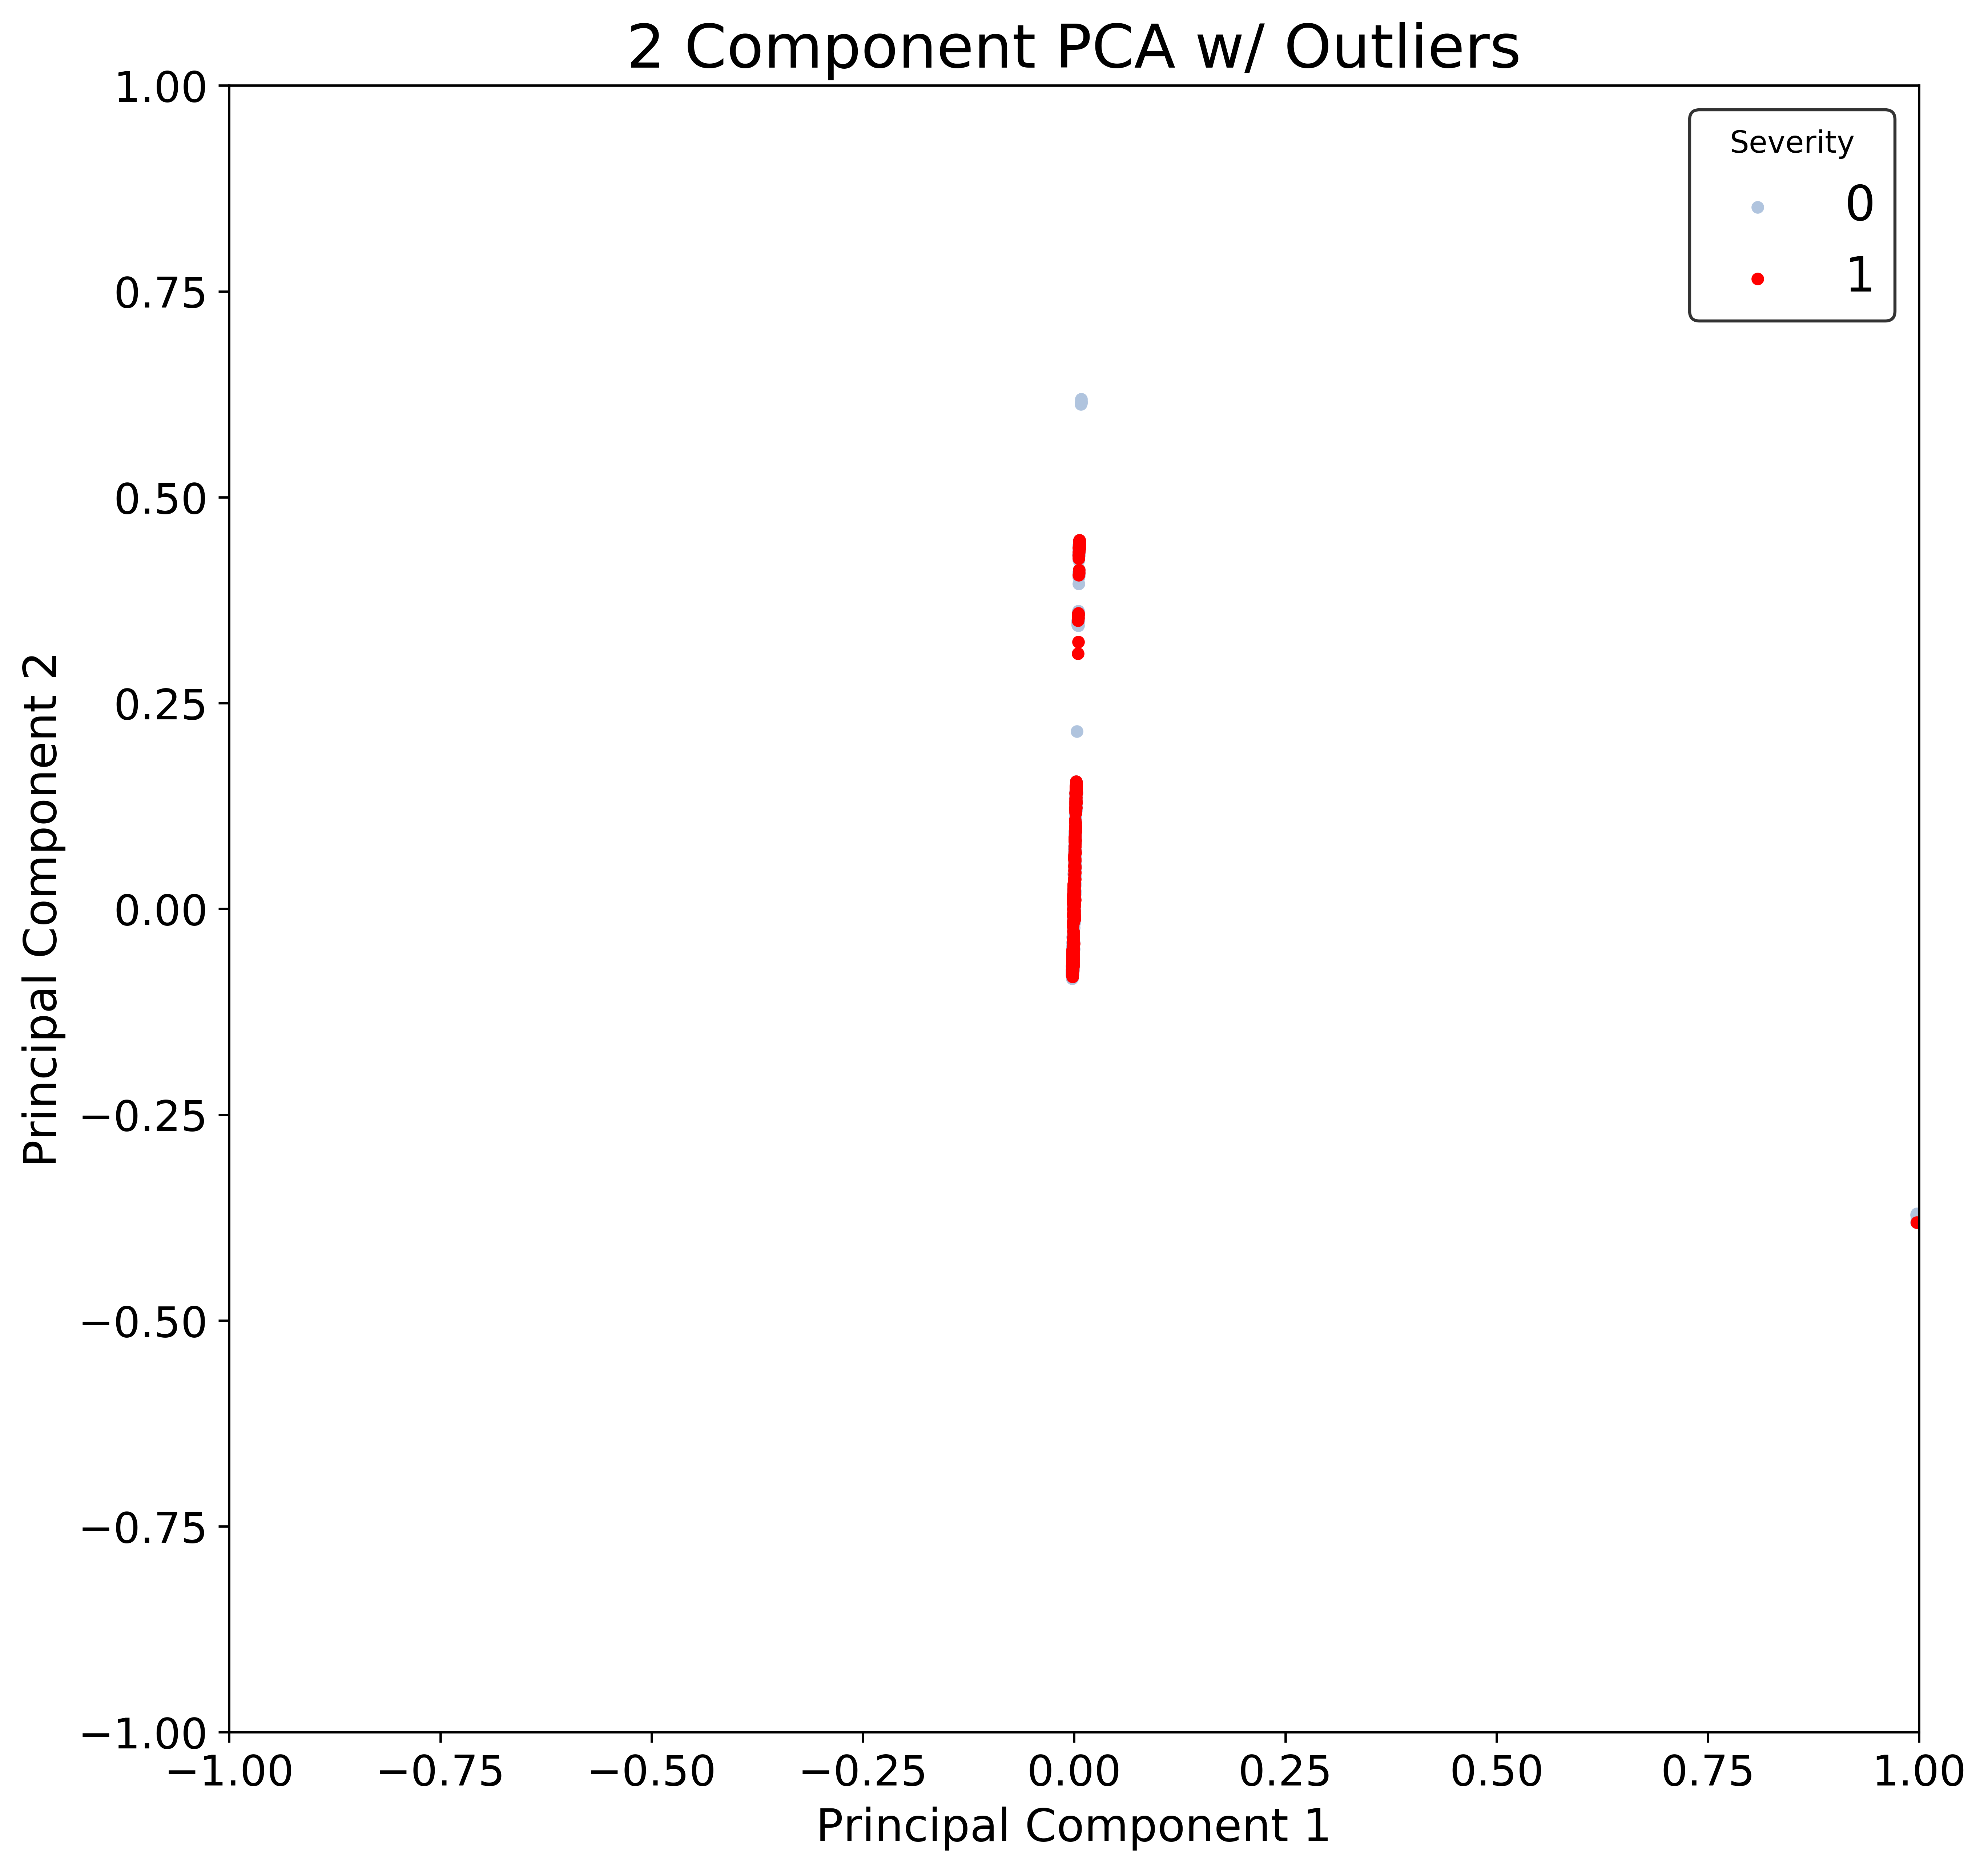

In [15]:
# Generate pca plot for outliers case without feature contribution arrows
fig = plt.figure(figsize = (10,10), dpi=600)
ax = fig.add_subplot(1,1,1) 
xs = PCs[:,0]
ys = PCs[:,1]
# scaling pca values between 0 and 1
scalex = 1.0/(xs.max() - xs.min())
scaley = 1.0/(ys.max() - ys.min())
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA w/ Outliers', fontsize = 20)
coeff=np.transpose(pca.components_[0:2, :])
labels=df.columns
targets = [0,1]
colors = ['lightsteelblue', 'red']

# fix color for each data point based on it's severity in the original DF
for target, color in zip(targets,colors):
    indicesToKeep = fDf['SEVERITY'] == target
    ax.scatter(fDf.loc[indicesToKeep, 'principal component 1']*scalex
               , fDf.loc[indicesToKeep, 'principal component 2']*scaley
               , c = color
               , s = 10)
#computing vector coordinates
xvector = pca.components_[0] * max(PCs[:,0])
yvector = pca.components_[1] * max(PCs[:,1])
# cycle for desired number of features in original DF to plot arrows
    # here only the first 12 features are shown
for i in range(12):
        #scaling of arrows to better visualization
        if abs(xvector[i]) > abs(yvector[i]):
            sign=xvector[i]/abs(xvector[i])
            yvector[i] = sign*0.7*(yvector[i]/xvector[i])
            xvector[i] = sign*0.7
        else:
            sign=yvector[i]/abs(yvector[i])
            xvector[i]=sign*0.7*(xvector[i]/yvector[i])
            yvector[i]=sign*0.7
        
        #plt.arrow(0, 0, xvector[i], yvector[i],color = 'seagreen',alpha = 1,width = 0.003)
        #plt.text(xvector[i]* 1.15, yvector[i] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center', rotation=-30)
ax.set_ylim(-1,1)
ax.set_xlim(-1,1)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.legend(targets,title='Severity',edgecolor='black',fontsize=16)
fig.savefig('PCA_w_outliers.png')

In [326]:
pca.explained_variance_ratio_

array([0.03853087, 0.03532167])

In [235]:
# scan through PCs for outliers and remove these data points
# current threshold for outliers set to >0.8
xs = principalComponents[:,0]
ys = principalComponents[:,1]
scalex = 1.0/(xs.max() - xs.min())
for index, row in finalDf.iterrows():
    if row['principal component 1']*scalex>0.8:
        #print(index)
        df=df.drop(index,axis=0)
df.to_excel('VAE1718_NoOutliers_BSEV_F_Young1.xlsx')

100
412
640
664
666
773
855
943
1003
1133
1179
1342
1466
1503
1508
1629
1834
1863
1883
1925
1946
2399
2468
2579
2619
2776
2859
2930
2955
3009
3155
3164
3268
3318
3393
3580
3627
3840
3924
4036
4274
4312
4370
4963
4973
5097
5111
5184
5213
5214
5392
5442
5501
5555
5781
5869
5953
6162
6258
6498
6502
6721
6748
6860
6913
7078
7128
7243
8172
8258
8290
8292
8306
8375
8494
8541
8542
8543
8580
8714
8956
9075
9560
9645
9792
10475
10500
10557


In [16]:
# Below is all identical to the above batches of code, simply done for the model once all the outliers are removed
df=pd.read_excel('VAE1718_NoOutliers_BSEV_F_Young1.xlsx')
from sklearn.decomposition import PCA
df.reset_index(drop=True,inplace=True)
pca = PCA(n_components=2, svd_solver='full')
# Separating out the features
X = df.iloc[:,:-1].values
# Separating out the target
y = df.iloc[:,-1].values
# Standardizing the features
X = StandardScaler().fit_transform(X)
pca.fit(X)
PCs=pca.transform(X)
#getting PCA results
pDf = pd.DataFrame(data = PCs
             , columns = ['principal component 1', 'principal component 2'])
fDf = pDf.join(df['SEVERITY'])

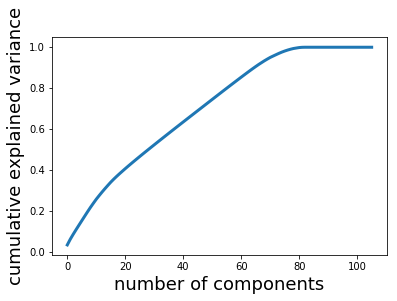

In [17]:
EVR=PCA(svd_solver='full').fit(X)
plt.plot(np.cumsum(EVR.explained_variance_ratio_),linewidth=3)
plt.xlabel('number of components',fontsize=18)
plt.ylabel('cumulative explained variance',fontsize=18);
plt.savefig('EXP_Var_No_Outliers.png')

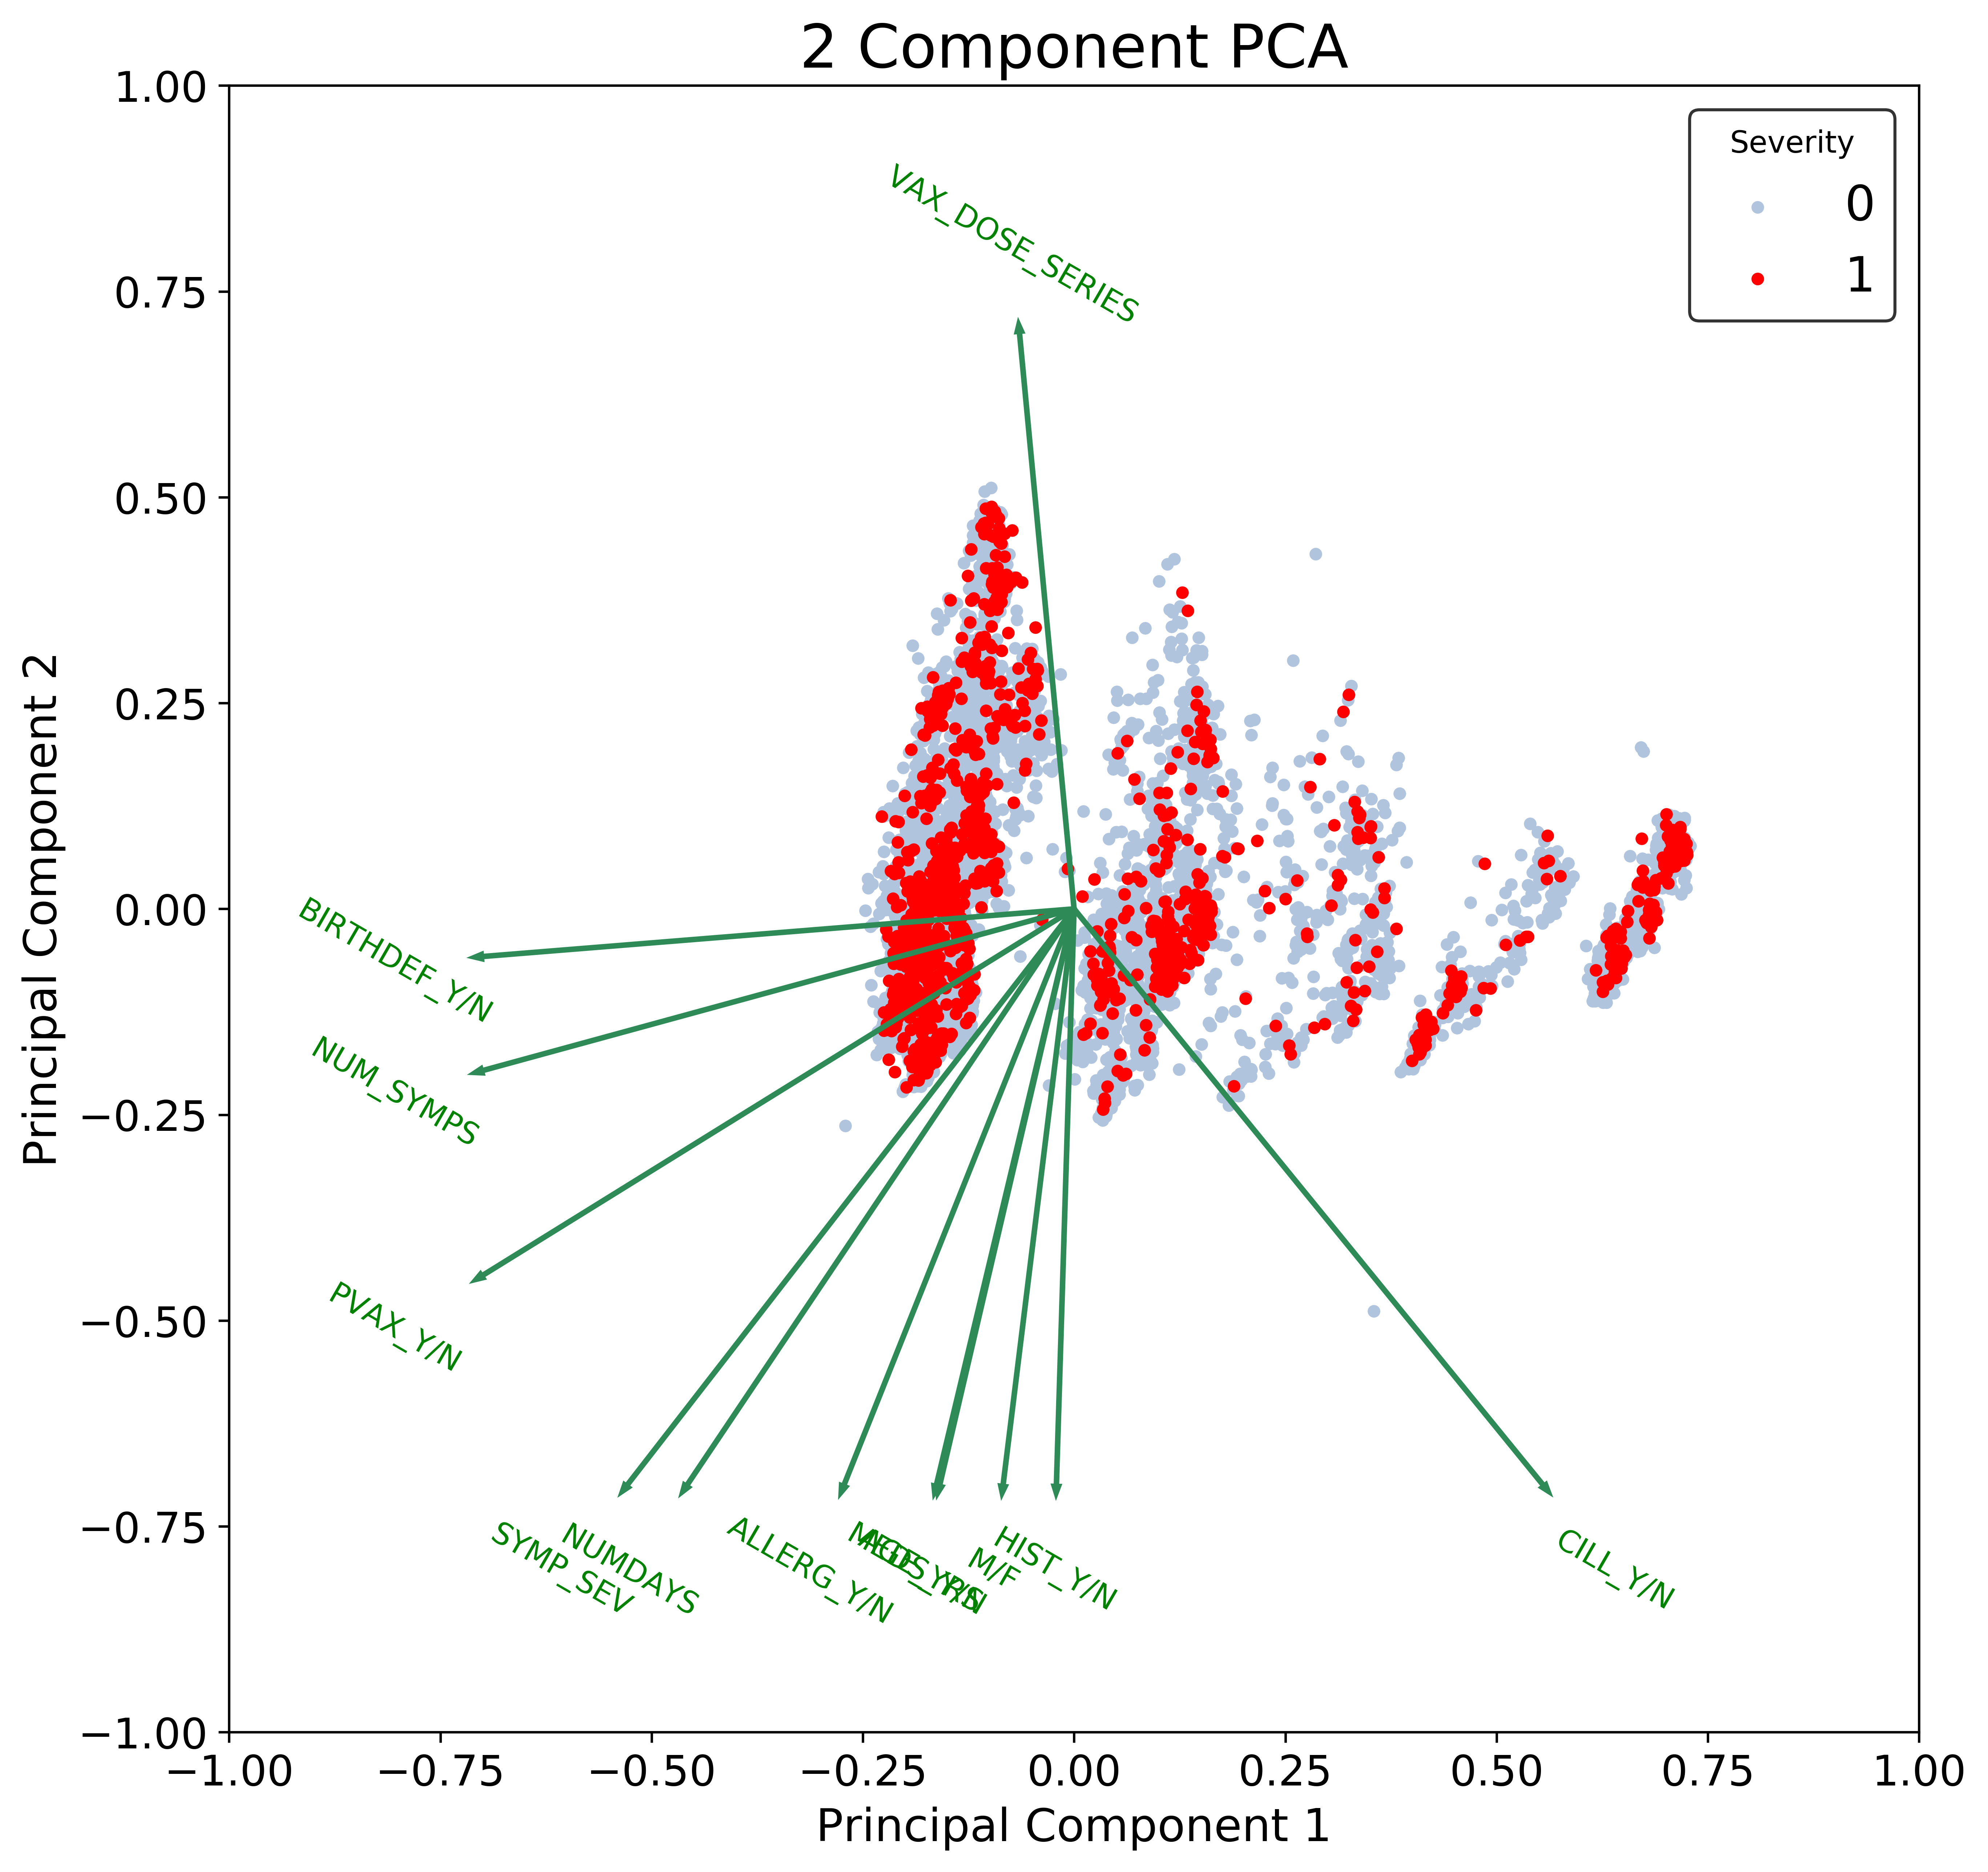

In [21]:
fig = plt.figure(figsize = (10,10), dpi=600)
ax = fig.add_subplot(1,1,1) 
xs = PCs[:,0]
ys = PCs[:,1]
scalex = 1.0/(xs.max() - xs.min())
scaley = 1.0/(ys.max() - ys.min())
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)
coeff=np.transpose(pca.components_[0:2, :])
labels=df.columns
targets = [0,1]
colors = ['lightsteelblue', 'red']

for target, color in zip(targets,colors):
    indicesToKeep = fDf['SEVERITY'] == target
    ax.scatter(fDf.loc[indicesToKeep, 'principal component 1']*scalex
               , fDf.loc[indicesToKeep, 'principal component 2']*scaley
               , c = color
               , s = 10)
    xvector = pca.components_[0] * max(PCs[:,0])
    yvector = pca.components_[1] * max(PCs[:,1])
for i in range(12):
    #if abs(xvector[i])>1 or abs(yvector[i])>1:
    if abs(xvector[i]) > abs(yvector[i]):
        sign=xvector[i]/abs(xvector[i])
        yvector[i] = sign*0.7*(yvector[i]/xvector[i])
        xvector[i] = sign*0.7
    else:
        sign=yvector[i]/abs(yvector[i])
        xvector[i]=sign*0.7*(xvector[i]/yvector[i])
        yvector[i]=sign*0.7
        
    plt.arrow(0, 0, xvector[i], yvector[i],color = 'seagreen',alpha = 1,width = 0.003)
    plt.text(xvector[i]* 1.15, yvector[i] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center', rotation=-30)
ax.set_ylim(-1,1)
ax.set_xlim(-1,1)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.legend(targets,title='Severity',edgecolor='black',fontsize=16)
fig.savefig('PCA_no_outliers.png')